In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [8]:
#import data from csv
filepath = "feature_results/feature_importances.csv"

data = pd.read_csv(filepath)

In [9]:
#drop the iteration, time, accuracy, and f1 columns
feature_data = data.drop(columns=['Iteration', 'Time', 'Accuracy', 'F1 Score'])

#get averages fom last row
averages = feature_data.tail(1).squeeze()

#drop last row
feature_data = feature_data.drop(feature_data.tail(1).index)

averages

#get labels from averages
averages.keys()




Index(['Blue', 'Green', 'Red', 'Gray', 'Gabor4', 'Gabor5', 'Gabor6', 'Gabor8',
       'Gabor11', 'Gabor23', 'Roberts', 'Sobel', 'Scharr', 'Prewitt',
       'Gaussian s3', 'Gaussian s7', 'Median s3', 'Felzenszwalb', 'Quickshift',
       'SLIC', 'Watershed'],
      dtype='object')

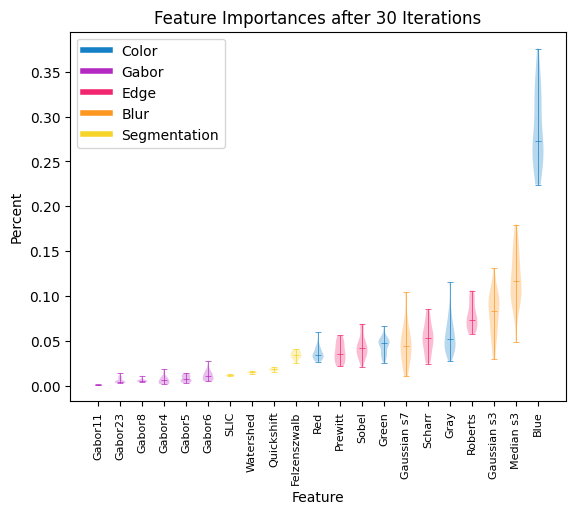

In [31]:
#make a box and whiskers for all feature

# Sort the features in ascending order by their average
sorted_features = averages.sort_values().index
colors = ['#1580C6','#B429C1', '#F1266F', '#FD971F', '#F6D42A','#00DB8E']

feature_color_mapping = {
    'Color': ['Blue', 'Green', 'Red', 'Gray'],
    'Gabor': ['Gabor4', 'Gabor5', 'Gabor6', 'Gabor8', 'Gabor11', 'Gabor23'],
    'Edge': ['Roberts', 'Sobel', 'Scharr', 'Prewitt'],
    'Blur': ['Gaussian s3', 'Gaussian s7', 'Median s3'],
    'Segmentation': ['Felzenszwalb', 'Quickshift', 'SLIC', 'Watershed']
}

# Map each feature to its color
feature_to_color = {}
for i, (category, features) in enumerate(feature_color_mapping.items()):
    for feature in features:
        feature_to_color[feature] = colors[i]

#create a sequence of colors in the order of the features
color_sequence = [feature_to_color[feature] for feature in sorted_features]


# Create the box and whiskers plot
violin_parts = plt.violinplot(
    feature_data[sorted_features], 
    vert=True, 
    showmedians=True,
    )

# Change the color of each feature's violin
for i, feature in enumerate(sorted_features):
    color = feature_to_color.get(feature, '#000000')  # Default to black if not found
    violin_parts['bodies'][i].set_facecolor(color)

for partname in ('cbars','cmins','cmaxes', 'cmedians'):
    violin_parts[partname].set_edgecolor(color_sequence)
    violin_parts[partname].set_linewidth(.5)


# Create a custom legend
legend_labels = list(feature_color_mapping.keys())
legend_handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
plt.legend(legend_handles, legend_labels, loc='upper left')

# Set the y-axis label
plt.ylabel('Percent')
# Set the x-axis label
plt.xlabel('Feature')
plt.xticks(rotation=90, fontsize=8)
plt.xticks(ticks=np.arange(1, len(sorted_features) + 1), labels=sorted_features)

# set title
plt.title('Feature Importances after 30 Iterations')
# plt.axhline(y=.01, color=colors[-1], linewidth=0.5)
# Show the plot

plt.savefig('feature_results/feature_importances.png', bbox_inches='tight')
plt.show()



In [11]:
15004.752699375153/30

500.1584233125051

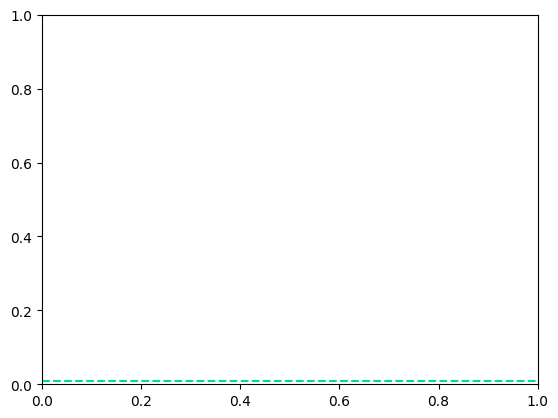

In [12]:
#lets make the same plot, but draw a line at 1 %
